<a href="https://colab.research.google.com/github/Alonge9500/Alonge9500/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


sns.set_palette('Set2')

In [ ]:
# Load Dataset
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Note:
* Dataset columns are in abbreviated format we will have to convert back to the normal format in the data dictionarty for visualization sake.

In [ ]:
#Mapping Data Back to original form
data['class'] = data['class'].map({'e':'edible','p':'poisonous'})
data['cap-shape'] = data['cap-shape'].map({'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'suken'})
data['cap-surface'] = data['cap-surface'].map({'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'})
data['cap-color'] = data['cap-color'].map({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
data['bruises'] = data['bruises'].map({'t':'bruises','f':'no'})
data['odor'] = data['odor'].map({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pugent','s':'spicy'})
data['gill-attachment'] = data['gill-attachment'].map({'a':'attached','d':'descending','f':'free','n':'notched'})
data['gill-spacing'] = data['gill-spacing'].map({'c':'close','w':'crowded','d':'distant'})
data['gill-size'] = data['gill-size'].map({'b':'broad','n':'narrow'})
data['gill-color'] = data['gill-color'].map({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
data['stalk-shape'] = data['stalk-shape'].map({'e':'enlarging','t':'tampering'})
data['stalk-root'] = data['stalk-root'].map({'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted','?':'missing'})
data['stalk-surface-above-ring'] = data['stalk-surface-above-ring'].map({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
data['stalk-surface-below-ring'] = data['stalk-surface-below-ring'].map({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].map({'n':'brown','b':'buff','c':'cinnamon','g':'gray','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].map({'n':'brown','b':'buff','c':'cinnamon','g':'gray','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
data['veil-type'] = data['veil-type'].map({'p':'partial','u':'universal'})
data['veil-color'] = data['veil-color'].map({'n':'brown','o':'orange','w':'white','y':'yellow'})
data['ring-number'] = data['ring-number'].map({'n':'none','o':'one','t':'two'})
data['ring-type'] = data['ring-type'].map({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheating','z':'zone'})
data['spore-print-color'] = data['spore-print-color'].map({'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'})
data['population'] = data['population'].map({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'})
data['habitat'] = data['habitat'].map({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'})

In [ ]:
#Save the New Data
data.to_csv('mushrooms_clean.csv', index=False)

## Data Visualization

* Beacause the data is clean we will move straight to visualization.

In [ ]:
# Load Data
data = pd.read_csv('mushrooms_clean.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pugent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pugent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


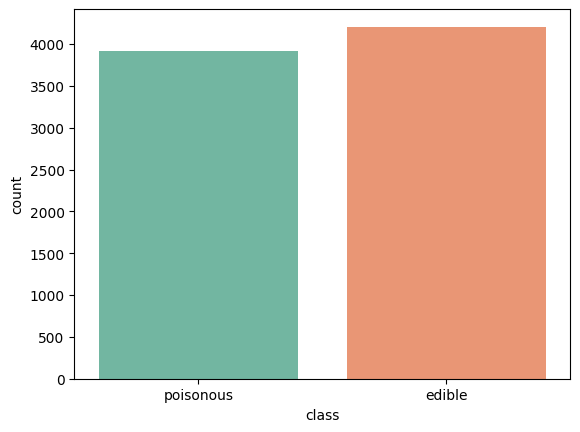

edible       4208
poisonous    3916
Name: class, dtype: int64


In [ ]:
# Mushroom Class
sns.countplot(data=data, x='class')
plt.show()

print(data['class'].value_counts())

* The Mushrooms class is a balance data with 4208 of the class being edible and 3916 poisonous

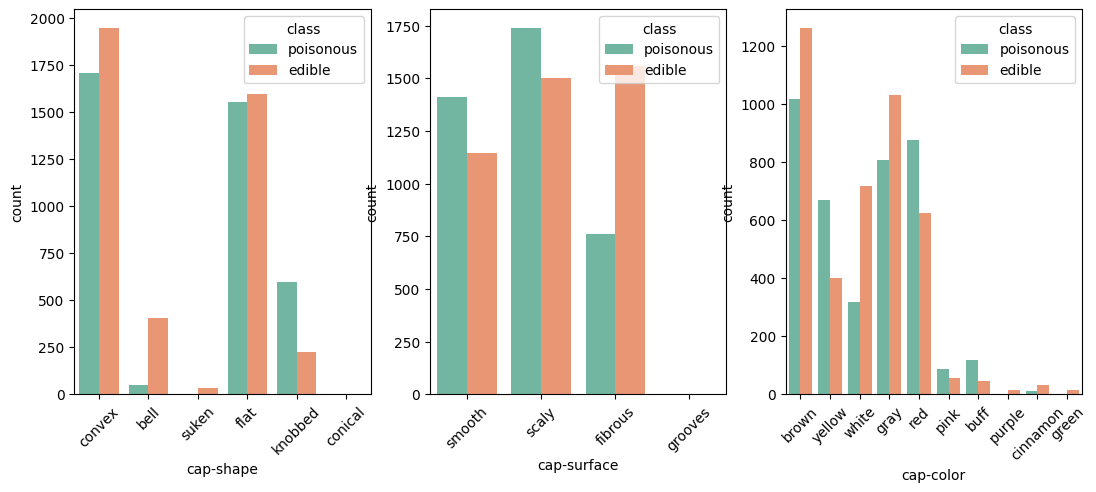

<Figure size 640x480 with 0 Axes>

In [ ]:
# Cap Features and Class Relation
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))
cap = ['cap-shape','cap-surface','cap-color']

for i,feature in enumerate(cap):
  sns.countplot(data=data, x=feature,hue='class', ax=axes[i])
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.show()
plt.tight_layout()


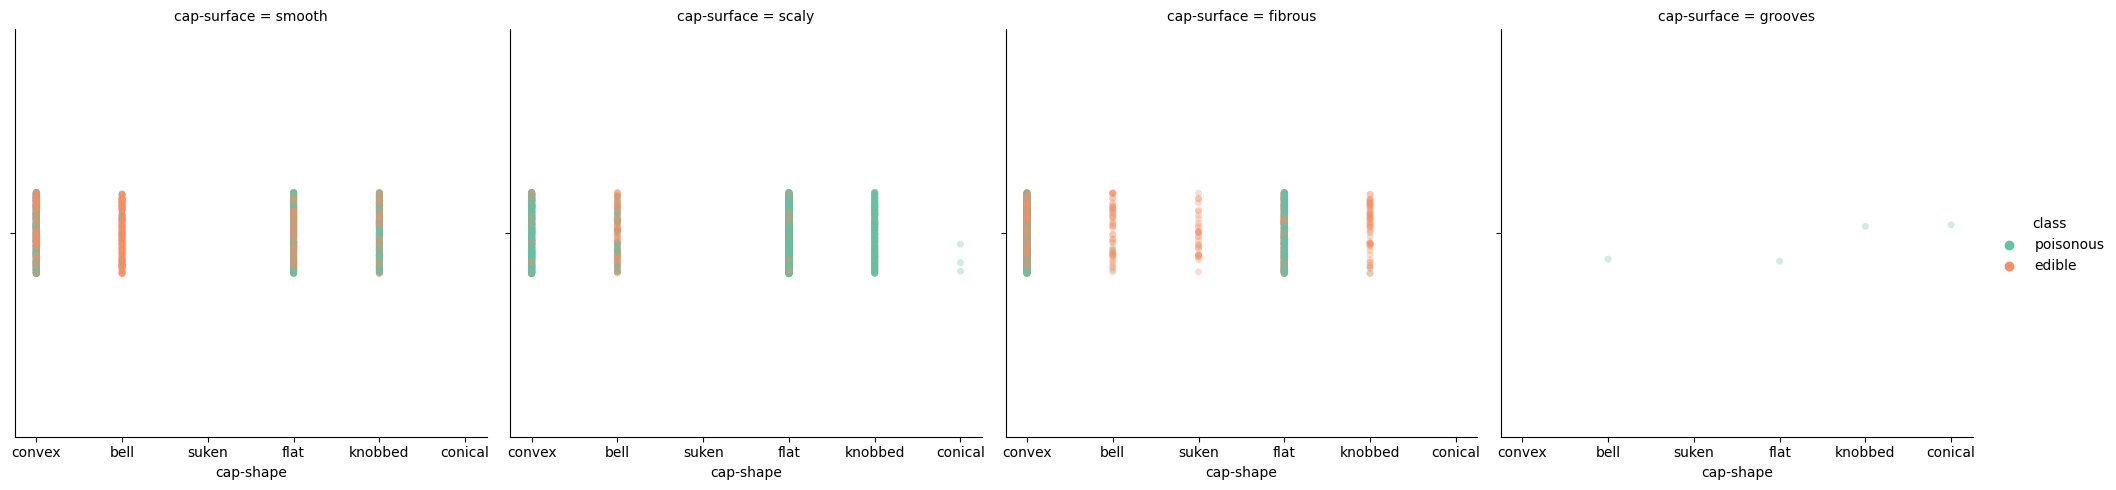

In [ ]:
sns.catplot(data=data, x='cap-shape',hue='class',col='cap-surface',alpha=0.3)
plt.show()

<ipython-input-63-f17598327b3f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


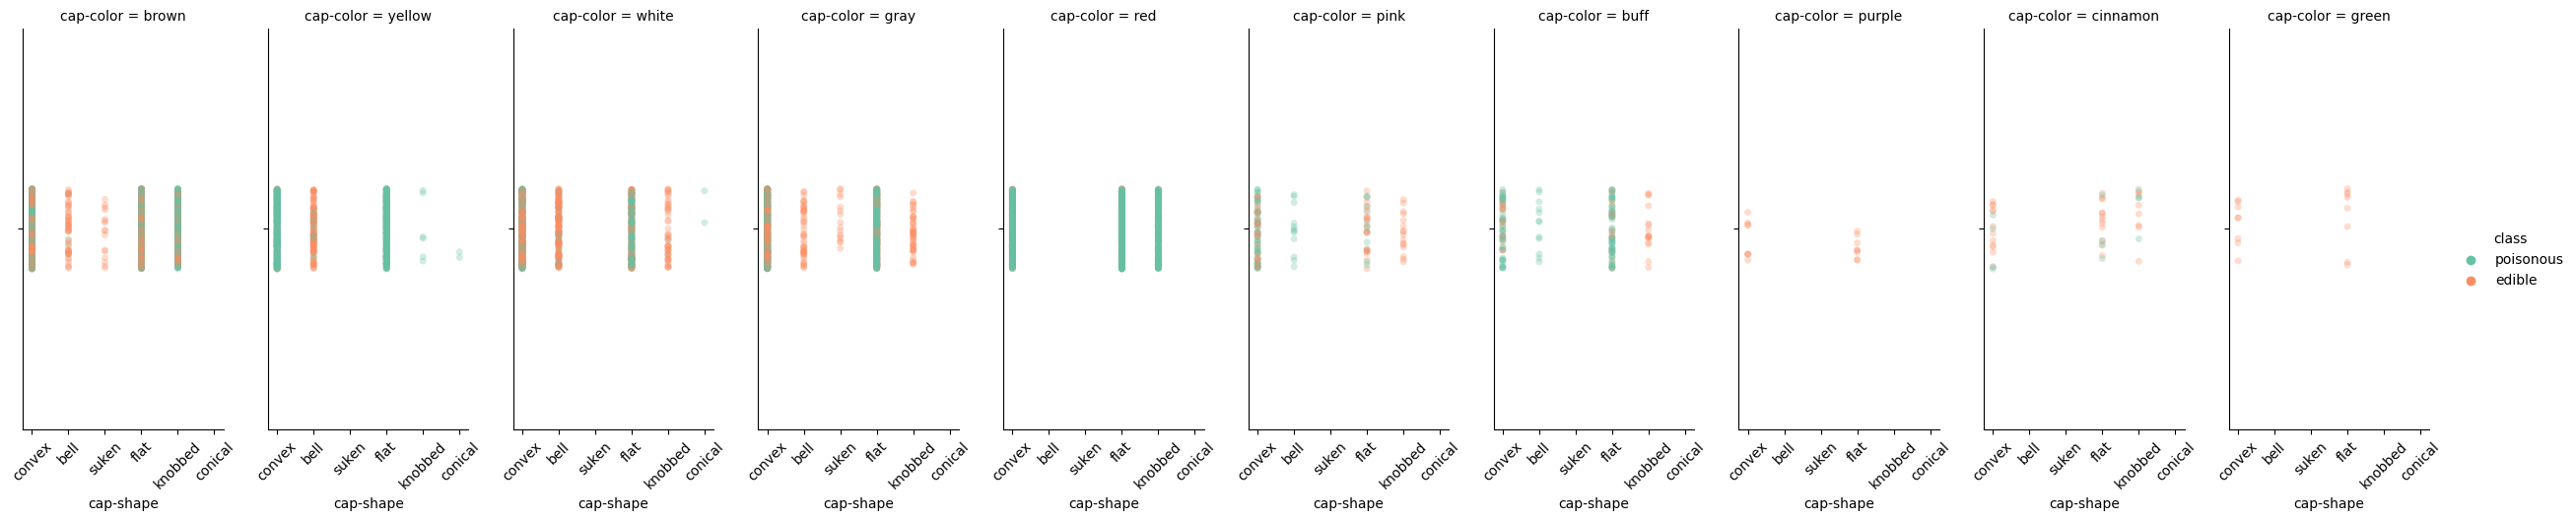

In [ ]:
# Cap-Shape vs Class vs Cap-color
plot = sns.catplot(data=data, x='cap-shape',hue='class',col='cap-color',aspect=0.5,alpha=0.3)
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

#### Cap Features vs Class
* Shape: Mushrooms with a cap-shape bell th=ends to have a higher frequency of edibility than other shapes the for both convex and flat shapes the ratio of edibility and poisonous is almost the same

* Surface: Also Caps with fibrous surface tends to produce more edible mushrooms than poisonous mushroom on a ratio bases in comparison to smooth and scaly

* Color: majority of white caps mushrooms are also more edible than poisonous

* The amount of grooves shaped mushrooms are low but if its grooves then its poisonos from our data

##### Dangerous to Eat Mushrooms
* Also base on the catplot its observed that if a mushroom has a scaly surface and a knnobed or conical shape its almost always going to be poisonous and also if its scaly and flat the probability of it been poisonous is also high but not as high as that of knnobed

##### Most Safe Mushrooms to eat base on cap Features

1. Fibrous Surface and suken, knobbed or bell shape
2. Smooth with bell shape
3. Mushrooms with yellow caps are also very safe to eat as long as the shape is not bell



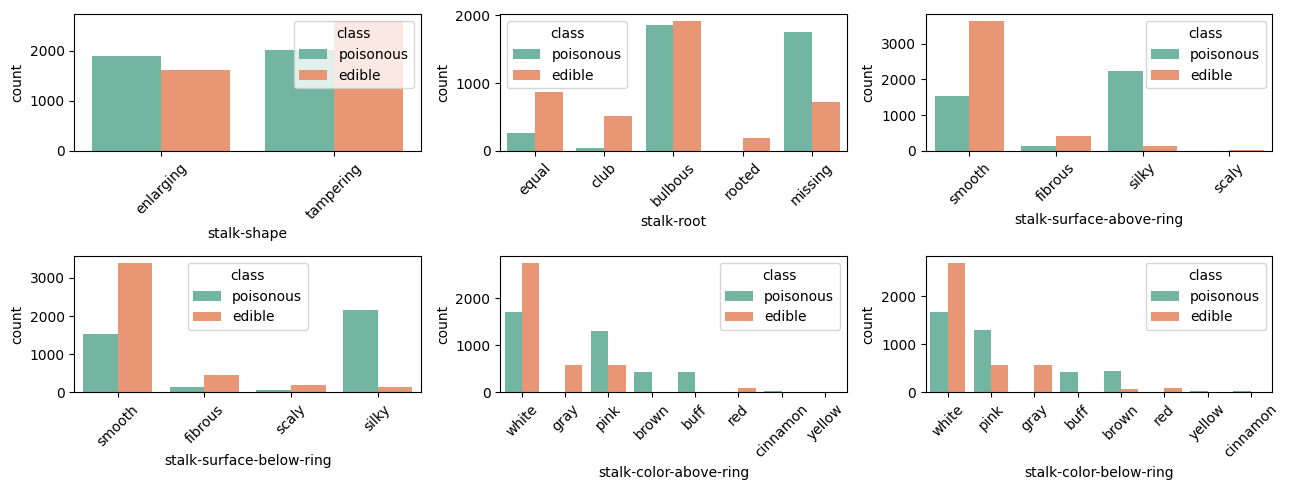

<Figure size 640x480 with 0 Axes>

In [ ]:
#Stalk Features vs Class
fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(13, 5))

stalk = ['stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']

for i,feature in enumerate(stalk):
  ax = axes2.flatten()[i]
  sns.countplot(data=data, x=feature,hue='class', ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.tight_layout()

plt.show()
plt.tight_layout()

<ipython-input-14-546c315b9324>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


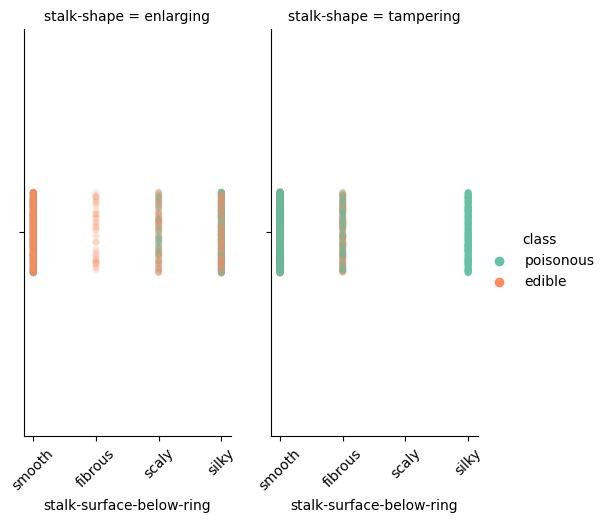

In [ ]:
# Stalk Shape vs Class Vs Stalk Surface below ring
plot = sns.catplot(data=data, x='stalk-surface-below-ring',hue='class',col='stalk-shape',aspect=0.5,alpha=0.1)
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<ipython-input-15-376b73b015cd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


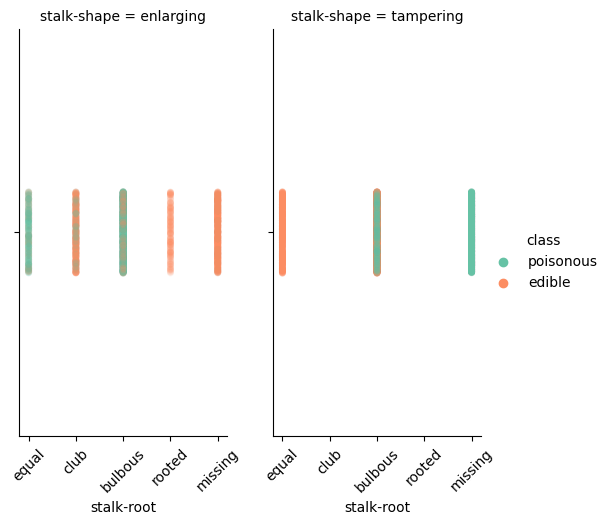

In [ ]:
# Stalk Shape vs Class Vs Stalk root
plot = sns.catplot(data=data, x='stalk-root',hue='class',col='stalk-shape',aspect=0.5,alpha=0.1)
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<ipython-input-16-429e42f2c4ef>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


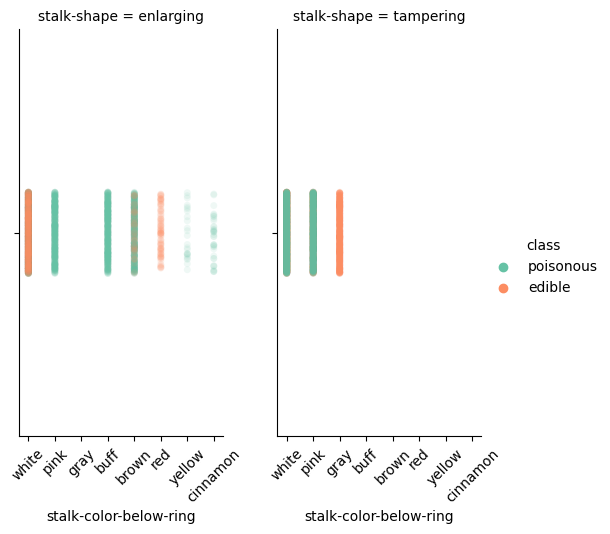

In [ ]:
# Stalk Shape vs Class Vs Stalk Surface below ring
plot = sns.catplot(data=data, x='stalk-color-below-ring',hue='class',col='stalk-shape',aspect=0.5,alpha=0.1)
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


#### Stalk Features Vs Class
* Stalk Root: Stalk roots with 'equal' tends to be mire edible while 'missing' tends to be more poisonous on a ratio level

* Also mushrooms with smooth stalk surface above ring is happens to be more edible unline the silky ones which are much more poisonous

* In the same order smooth stalk surface below ring, white stalk color above ring and white stalk color below ring are has more percentage of ediblility
* Silky suface below ring and tampering shape happens to be more edible on a larger frequency than any other class in the category of stalk surface below the ring and shape and also if the root is missing amd shape is tampering its also more edible

* If root is missing and shape is enlarging it happens that the mushroom has a very great percentage of been poisonous

* If we also consider the equal root group if the shape is tampering its poisonus to eat but if the shape is enlarging it has more chances of been edible i.e no matter what the shape is its edibility is greatly dependent on the root type
* The enlarging shape mushroom cannot be of the gray color stalk below the ring while the tampering shape cannot be of color buff,brown,yellow, red or cinammon
* and in general it looks like the gray color stalk below the ring mushroom is always poisonous while the white is mostly poisonous if the shape is enlarging and less poisonous if the shape is tampering

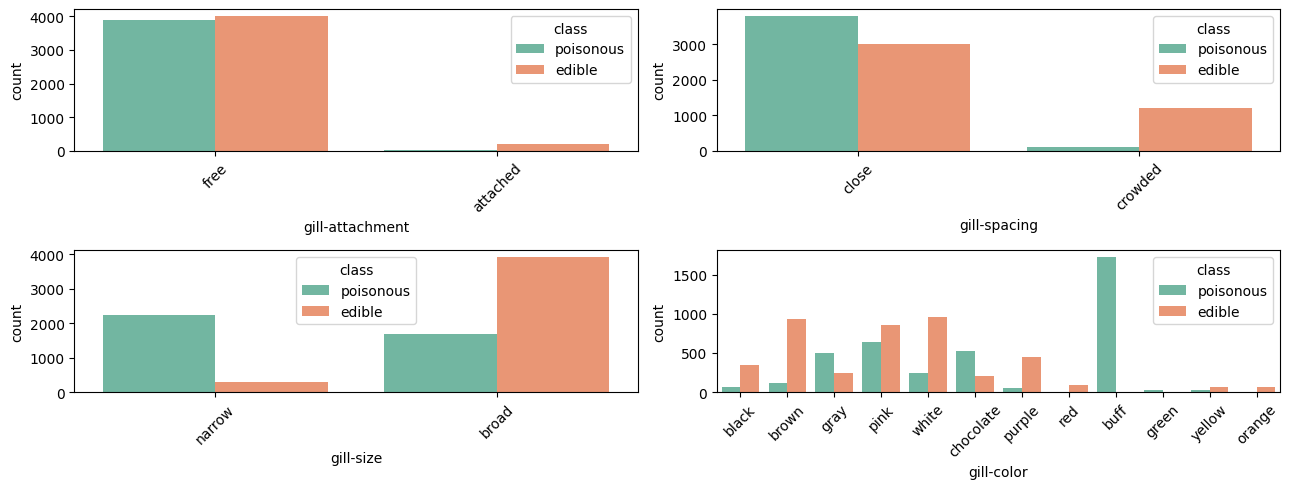

<Figure size 640x480 with 0 Axes>

In [ ]:
#Gill Features vs Class
gills = ['gill-attachment','gill-spacing', 'gill-size','gill-color']

fig3, axes3 = plt.subplots(nrows=2, ncols=2, figsize=(13, 5))

for i,feature in enumerate(gills):
  ax = axes3.flatten()[i]
  sns.countplot(data=data, x=feature,hue='class', ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.tight_layout()

plt.show()
plt.tight_layout()

#### Gill Features vs Class
* The attached gill attachment appears only few time and all are edible
While the close gills spacing are more poisonous than edible but not so for the crowded category which is more edible than poisonous
* Narrow gills size are also more poisonous while the broad size gills mushrooms are more edible although some times poisonous depending on other features.
* A Buff colored gill mushroom 🍄 is always edible because of its very high appreance frequency in which all are edible.


### Split Data

In [ ]:
y = data['class']
X= data.drop('class', axis =1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


### Label Encoding

In [ ]:
label_mapping = {}  # To store the mapping of encoded labels

for feature in list(X_train.columns):
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    X_val[feature] = le.transform(X_val[feature])
    label_mapping[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

le2 = LabelEncoder()
y_train= le2.fit_transform(y_train)
y_test= le2.transform(y_test)
y_val= le2.transform(y_val)
label_mapping['class'] = dict(zip(le2.classes_, le2.transform(le2.classes_)))
# Checking the label mapping
print(label_mapping)

{'cap-shape': {'bell': 0, 'conical': 1, 'convex': 2, 'flat': 3, 'knobbed': 4, 'suken': 5}, 'cap-surface': {'fibrous': 0, 'grooves': 1, 'scaly': 2, 'smooth': 3}, 'cap-color': {'brown': 0, 'buff': 1, 'cinnamon': 2, 'gray': 3, 'green': 4, 'pink': 5, 'purple': 6, 'red': 7, 'white': 8, 'yellow': 9}, 'bruises': {'bruises': 0, 'no': 1}, 'odor': {'almond': 0, 'anise': 1, 'creosote': 2, 'fishy': 3, 'foul': 4, 'musty': 5, 'none': 6, 'pugent': 7, 'spicy': 8}, 'gill-attachment': {'attached': 0, 'free': 1}, 'gill-spacing': {'close': 0, 'crowded': 1}, 'gill-size': {'broad': 0, 'narrow': 1}, 'gill-color': {'black': 0, 'brown': 1, 'buff': 2, 'chocolate': 3, 'gray': 4, 'green': 5, 'orange': 6, 'pink': 7, 'purple': 8, 'red': 9, 'white': 10, 'yellow': 11}, 'stalk-shape': {'enlarging': 0, 'tampering': 1}, 'stalk-root': {'bulbous': 0, 'club': 1, 'equal': 2, 'missing': 3, 'rooted': 4}, 'stalk-surface-above-ring': {'fibrous': 0, 'scaly': 1, 'silky': 2, 'smooth': 3}, 'stalk-surface-below-ring': {'fibrous': 0,

In [ ]:
print(label_mapping['class'])

{'edible': 0, 'poisonous': 1}


### Model Building
* Decision Tree Classifier

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
testprediction1 = model1.predict(X_test)
trainprediction1 = model1.predict(X_train)
valprediction1 = model1.predict(X_val)
print('.......................Test Set Classification Report..................................')
print(classification_report(testprediction1,y_test))

print('.......................Val Set Classification Report..................................')
print(classification_report(valprediction1,y_val))


print('.......................Train Classification Report..................................')
print(classification_report(trainprediction1,y_train))


.......................Test Set Classification Report..................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

.......................Val Set Classification Report..................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

.......................Train Classification Report..................................
              precision    recall  f1-score   support

           0       1.00      1.

* LightGBM

In [ ]:
model2 = LGBMClassifier()
model2.fit(X_train,y_train)

LGBMClassifier()

In [ ]:
testprediction2 = model2.predict(X_test)
trainprediction2 = model2.predict(X_train)
valprediction2 = model2.predict(X_val)
print('.......................Test Set Classification Report..................................')
print(classification_report(testprediction2,y_test))

print('.......................Val Set Classification Report..................................')
print(classification_report(valprediction2,y_val))

print('.......................Train Set Classification Report..................................')
print(classification_report(trainprediction2,y_train))


.......................Test Set Classification Report..................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

.......................Val Set Classification Report..................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

.......................Train Set Classification Report..................................
              precision    recall  f1-score   support

           0       1.00    

* Cross Validation

In [ ]:
y_test_series = pd.Series(y_test, name='class')
y_train_series = pd.Series(y_train, name='class')
y_val_series = pd.Series(y_val, name='class')

allX = pd.concat([X_test,X_train,X_val], axis=0)
ally = pd.concat([y_test_series, y_train_series, y_val_series], axis=0)
model3 = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation
scores = cross_val_score(model3, allX, ally, cv=kfold, scoring='f1', error_score='raise')

# Print the average and standard deviation of the scores
print("Cross-validated accuracy: %.2f%% (+/- %.2f%%)" % (scores.mean() * 100, scores.std() * 100))
print(scores)

Cross-validated accuracy: 100.00% (+/- 0.00%)
[1. 1. 1. 1. 1.]


In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',